<a href="https://colab.research.google.com/github/juridicodiniz/devai/blob/main/atividade_3_alterar_heuristica_arvore_decisao_atributos_continuos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Árvore de decisão para atributos contínuos**

---



Alterar a heurística de uma Árvore de decisão para atributos contínuos
A partir do código implementado em aula, altere a função melhorValor, de forma que esta busque todos os valores de cada característica que seja a média entre duas instâncias consecutivas, em relação à ordem dos valores daquela característica.

postre/aula6b_Árvores_de_decisão_atributos_contínuos.ipynb at main · fboldt/postre (github.com)

Isto é, na nova heurística, os valores verificados serão calculados da seguinte forma. Para cada característica, ordene as instâncias pelo valor e teste o valor médio entre a primeira e a segunda instância. Depois teste o valor médio entre a segunda e a terceira instância, e assim por diante. A nova função deve retornar o melhor valor encontrado para aquela característica.

Compare a nova heurística com a antiga usando um dataset diferente do usado na aula.

Qual heurística apresenta melhor desempenho de classificação no novo dataset?

Qual heurística treina seus modelos mais rapidamente?

Coloque o link de um jupyter notebook no seu GitHub para ser avaliado.

In [ ]:
#Arvore de decisão para Atributos Continuos

#Usarando o dataset  Cancer (Câncer de Mama)::

# Este conjunto de dados contém medidas de características de células de câncer de mama e é frequentemente utilizado para tarefas de classificação binária.
#Número de Classes: 2 (maligno ou benigno).

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine



#dataset = load_iris()
#dataset = load_breast_cancer()
dataset = load_wine()


X, y = dataset.data, dataset.target

In [ ]:
set(y), len(y), X.shape[1]


({0, 1, 2}, 178, 13)

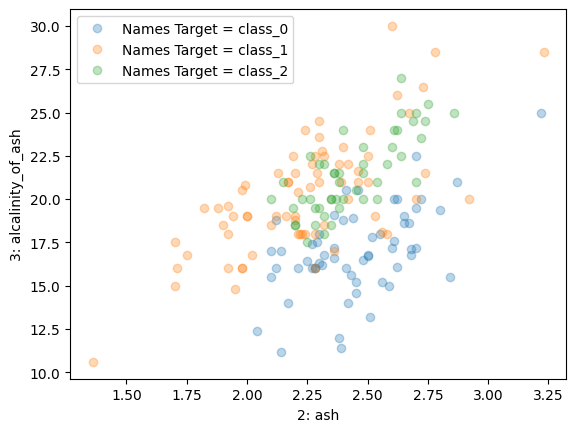

In [ ]:
import matplotlib.pyplot as plt
i, j = 2, 3
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], 'o', alpha=0.3, label=f"Names Target = {dataset.target_names[k]}")
plt.legend()
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import numpy as np
from sklearn.model_selection import cross_validate

#função para retornar o mais frequente
def maisFrequente(y):
  return Counter(y.flat).most_common(1)[0][0]

#calculo da impureza, quanto mais uniforme for as resposta, mais puro é o valor
def impureza(y): #Gini  -  só olha o Y
  labels = list(set(y))
  labels.sort()
  probabilidade = np.zeros((len(labels),))
  for i, k in enumerate(labels):
    probabilidade[i] = sum(y==k)/len(y)
  result = 1 - sum(probabilidade ** 2)
  return result

impureza(y[:])

0.6583133442747129

In [ ]:
#calculo da impureza, quanto mais uniforme for as resposta, mais puro é o valor
def impureza(y): #Gini  -  só olha o Y
  labels = list(set(y))
  labels.sort()
  probabilidade = np.zeros((len(labels),))
  for i, k in enumerate(labels):
    probabilidade[i] = sum(y==k)/len(y)
  result = 1 - sum(probabilidade ** 2)
  return result

impureza(y[:])

0.6583133442747129

In [ ]:
#Calculo da impureza olhando o X
def impurezaValor(x, y, valor):
  maiores = x > valor
  impurezamaiores = impureza(y[maiores])
  proporcaomaiores = sum(maiores)/len(y)
  impurezamenores = impureza(y[~maiores])
  proporcaomenores = sum(~maiores)/len(y)
  impurezaTotal = proporcaomaiores * impurezamaiores + proporcaomenores*impurezamenores
  return impurezaTotal,  impurezamenores, impurezamaiores

impurezaValor(X[:,2], y, 2.5)

(0.6434985114760395, 0.6419753086419754, 0.647189349112426)

In [ ]:
#Calculo do melhor valor
def melhorValor(x,y):
  result = None
  menorImpureza = float('inf')
  xmax = np.max(x)
  xmin = np.min(x)
  while True:
    valor = (xmin+xmax)/2
    impTotal, impMenores, impMaiores = impurezaValor(x,y, valor)
    if impTotal < menorImpureza:
      menorImpureza = impTotal
      result = valor
      if impMaiores == 0 or impMenores == 0:
        break
      if impMaiores < impMenores:
        xmin = valor
      else:
        xmax = valor
    else:
      break
  return result, menorImpureza

#Calcular  o melhor valor usando a caracteristica 2
melhorValor(X[:,2],y)

(2.295, 0.6139307817100282)

In [ ]:
#Altere a função melhorValor, de forma que esta busque todos os valores de cada característica
# que seja a média entre duas instâncias consecutivas, em relação à ordem dos valores daquela característica.

# **********************************************Calculo do melhor valor com Méida de cada valor com seu Adjacente
def melhorValor2(x,y):
  result = None
  menorImpureza = float('inf')

  # Ordenando o vetor em ordem crescente
  x_ordenado = np.sort(x)

  #  Verificar se há apenas uma instância, retornar o valor e a impureza
  if len(x_ordenado) == 1:
    return x_ordenado[0], impureza(y)

  # Calculando a média de cada elemento com seu adjacente
  for i in range(len(x_ordenado) - 1):
    valor = (x_ordenado[i] + x_ordenado[i + 1]) / 2
    impTotal, impMenores, impMaiores = impurezaValor(x,y, valor)
    if impTotal < menorImpureza:
      menorImpureza = impTotal
      result = valor
      if impMaiores == 0 or impMenores == 0:
        break
      if impMaiores < impMenores:
        xmin = valor
      else:
        xmax = valor
    else:
      break
  return result, menorImpureza

#Calcular  o melhor valor usando a caracteristica 2
melhorValor2(X[:,2],y)


(1.53, 0.6552402716942805)

In [ ]:
# Melhor Caracteristica calculando com media de menor e maior valor
def melhorCaracteristica(X,y,show_msg= 0):
  impurezas = []
  valores = []
  for caracteristica in range(X.shape[1]):
    valor, imp = melhorValor(X[:,caracteristica],y)
    impurezas.append(imp)
    valores.append(valor)
  if show_msg:
    print(impurezas)
    print(valores)
  impurezas = np.array(impurezas)
  caracteristica = np.argmin(impurezas)
  return impurezas[caracteristica], caracteristica, valores[caracteristica]

melhorCaracteristica(X,y,1)

[0.47001468529080287, 0.6124398073836277, 0.6139307817100282, 0.5981148010327952, 0.6508129624139071, 0.5180985658171189, 0.5276268675145079, 0.5755958223341684, 0.6329805026434241, 0.557744825238045, 0.6151650280898876, 0.46338693174884793, 0.43761750381193476]
[12.93, 3.27, 2.295, 20.3, 116.0, 2.4299999999999997, 2.71, 0.395, 1.995, 7.14, 1.095, 1.9525, 979.0]


(0.43761750381193476, 12, 979.0)

In [ ]:
# ************************* Melhor Caracteristica calculando com media de um valor com o proximo valor
def melhorCaracteristica2(X,y,show_msg= 0):
  impurezas = []
  valores = []
  for caracteristica in range(X.shape[1]):
    valor, imp = melhorValor2(X[:,caracteristica],y)
    impurezas.append(imp)
    valores.append(valor)
  if show_msg:
    print('melhorCaracteristica2_impurezas=',impurezas)
    print('melhorCaracteristica2_valores=',valores)
  impurezas = np.array(impurezas)
  caracteristica = np.argmin(impurezas) # retorna o índice do menor valor em um array NumPy
  return impurezas[caracteristica], caracteristica, valores[caracteristica]

melhorCaracteristica2(X,y,0)

(0.6537802323366977, 5, 1.04)

In [ ]:
#Implementação da Arvore usando o melhor valor da caracteristica
#Calculamos a cima a caracteristca de menor impureza e é a 2, vamos usa-la aqui na arvore.

#Se chamar a classe passando 1 como parametro ela vai exibir as mensagens

class Arvore(BaseEstimator, ClassifierMixin):
  def __init__(self, show_msg= 0):
        self.show_msg = show_msg
  def fit(self, X, y):
    self.impureza, self.caracteristica, self.valor = melhorCaracteristica(X,y)
    maiores = X[:,self.caracteristica] > self.valor
    if self.show_msg:
      print(self.caracteristica, self.valor,sum(maiores),sum(~maiores) )
    if sum(maiores) > 0 and sum(~maiores)>0:
      self.maiores = Arvore(self.show_msg)
      self.maiores.fit(X[maiores,:], y[maiores])
      self.menores = Arvore(self.show_msg)
      self.menores.fit(X[~maiores,:], y[~maiores])
    else:
      self.resposta = maisFrequente(y) # será folha, pois todos são maiores ou menores, não tem misturado
    return self
  def predict(self, X, y=None):
    y = np.empty((X.shape[0]))
    if hasattr(self,'resposta'):
      y[:] = self.resposta
    else:
      if (self.caracteristica >= X.shape[1]):
        self.caracteristica = X.shape[1] -1
      maiores = X[:,self.caracteristica] > self.valor
      y[maiores] = self.maiores.predict(X[maiores,:])
      y[~maiores] = self.menores.predict(X[~maiores,:])
    return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
sum(y==ypred)/len(y)

1.0

In [ ]:
#medindo o tempo de execução da Arvore
import time

#Medindo o tempo de execução do método
inicio = time.time()

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
sum(y==ypred)/len(y)

# Finalizando a medição
fim = time.time()

# Calculando e imprimindo o tempo decorrido
tempo_decorrido = fim - inicio
print(f"Tempo de execução do Classificador ARVORE: {tempo_decorrido:.6f} segundos")

Tempo de execução do Classificador ARVORE: 0.161453 segundos


In [ ]:
# ******************************Implementação da Arvore usando o melhor valor da caracteristica calculando de outro forma

#Se chamar a classe passando 1 como parametro ela vai exibir as mensagens

class Arvore2(BaseEstimator, ClassifierMixin):
  def __init__(self, show_msg= 0):
        self.show_msg = show_msg
  def fit(self, X, y):
    self.impureza, self.caracteristica, self.valor = melhorCaracteristica2(X,y,self.show_msg)

    if isinstance(self.valor, type(None)):
     self.impureza, self.caracteristica, self.valor = melhorCaracteristica2(X, y, self.show_msg, True)

    if self.show_msg:
      print(X[:,self.caracteristica],' > ', self.valor)
    maiores = X[:,self.caracteristica] > self.valor
    if self.show_msg:
      print(self.caracteristica, self.valor,sum(maiores),sum(~maiores) )
    if sum(maiores) > 0 and sum(~maiores)>0:
      self.maiores = Arvore2(self.show_msg)
      self.maiores.fit(X[maiores,:], y[maiores])
      self.menores = Arvore2(self.show_msg)
      self.menores.fit(X[~maiores,:], y[~maiores])
    else:
      self.resposta = maisFrequente(y) # será folha, pois todos são maiores ou menores, não tem misturado
    return self
  def predict(self, X, y=None):
    y = np.empty((X.shape[0]))
    if hasattr(self,'resposta'):
      y[:] = self.resposta
    else:
      if self.show_msg:
        print('else: self.caracteristica=',self.caracteristica,' N colunas de X=', X.shape[1])
        print('else: ',X[:,self.caracteristica],' > ', self.valor)
      if (self.caracteristica >= X.shape[1]):
        self.caracteristica = X.shape[1] -1
      maiores = X[:,self.caracteristica] > self.valor
      y[maiores] = self.maiores.predict(X[maiores,:])
      y[~maiores] = self.menores.predict(X[~maiores,:])
    return y

modelo = Arvore2(0)
modelo.fit(X,y)
ypred = modelo.predict(X)
sum(y==ypred)/len(y)

1.0

In [ ]:
#medindo o tempo de execução da Arvore
import time

#Medindo o tempo de execução do método
inicio = time.time()

modelo = Arvore2()
modelo.fit(X,y)
ypred = modelo.predict(X)
sum(y==ypred)/len(y)

# Finalizando a medição
fim = time.time()

# Calculando e imprimindo o tempo decorrido
tempo_decorrido = fim - inicio

t_execucao = "Tempo de execução: {} segundos".format(tempo_decorrido)
print(t_execucao)

print(f"Tempo de execução do Classificador ARVORE: {tempo_decorrido:.6f} segundos")

Tempo de execução: 0.1646409034729004 segundos
Tempo de execução do Classificador ARVORE: 0.164641 segundos


In [ ]:
#Validacao Cruzada com Arvore, sem passar parametros para não exibir msg
scores = cross_validate(Arvore(0),X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.77777778, 0.88888889, 0.83333333, 1.        , 0.97142857]),
 0.8942857142857144)

In [ ]:
#Validacao Cruzada com Arvore, sem passar parametros para não exibir msg
scores = cross_validate(Arvore2(0),X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.83333333, 0.91666667, 0.97222222, 0.97142857, 0.91428571]),
 0.9215873015873017)

In [ ]:
import matplotlib.pyplot as plt
import time



def plotDecisao(modelo, X, y,titlulo='Gráfico'):

  #Medindo o tempo de execução do método
  inicio = time.time()

  modelo.fit(X, y)
  x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100)
  x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  Xdec = np.c_[x0.ravel(), x1.ravel()]
  ypred = modelo.predict(Xdec)

  # Finalizando a medição
  fim = time.time()

  # Calculando e imprimindo o tempo decorrido
  tempo_decorrido = fim - inicio
  t_execucao = "Tempo de execução: {} segundos".format(tempo_decorrido)

  plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
  for k in set(y):
    plt.plot(X[:,0][y==k], X[:,1][y==k], 'o')
  plt.title(titlulo + " / " + t_execucao, fontsize=16, color='blue', fontweight='bold')
  plt.show()

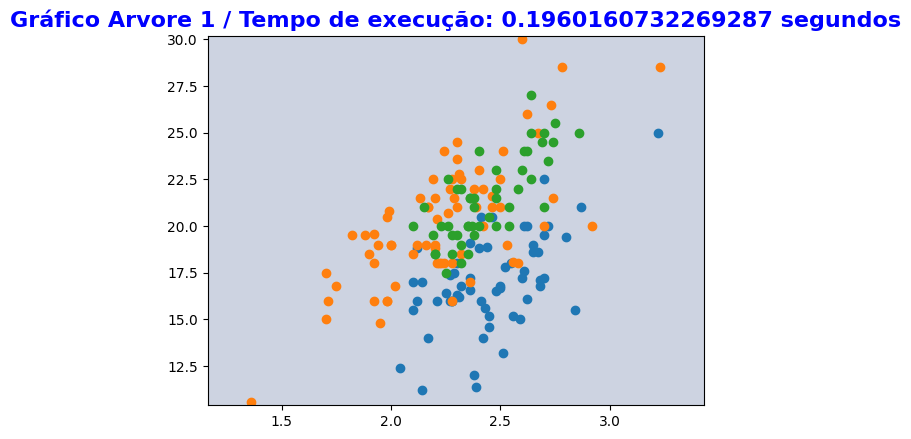

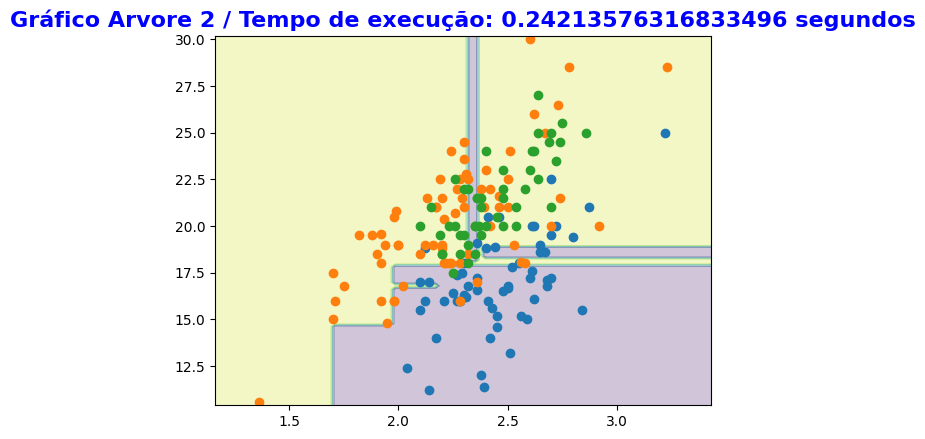

In [ ]:
#PLotando para caracterustica 2 em diante
#: antes da vírgula refere-se a todas as linhas do array.
#2: depois da vírgula refere-se às colunas da 2ª em diante.

plotDecisao(Arvore(0), X[:,2:], y,'Gráfico Arvore 1')
plotDecisao(Arvore2(0), X[:,2:], y,'Gráfico Arvore 2')

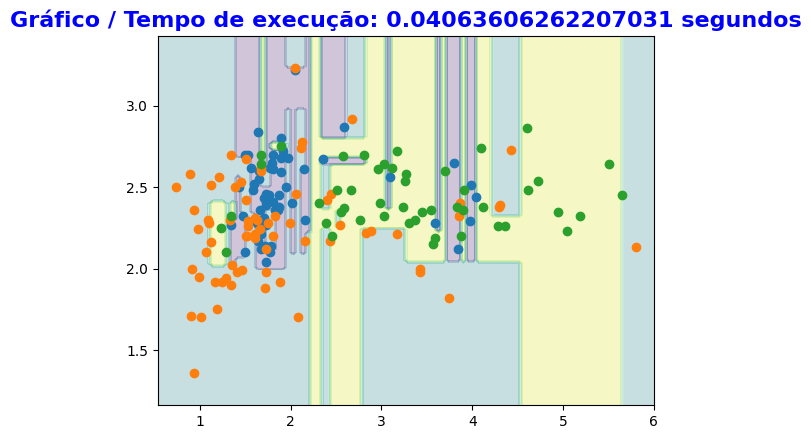

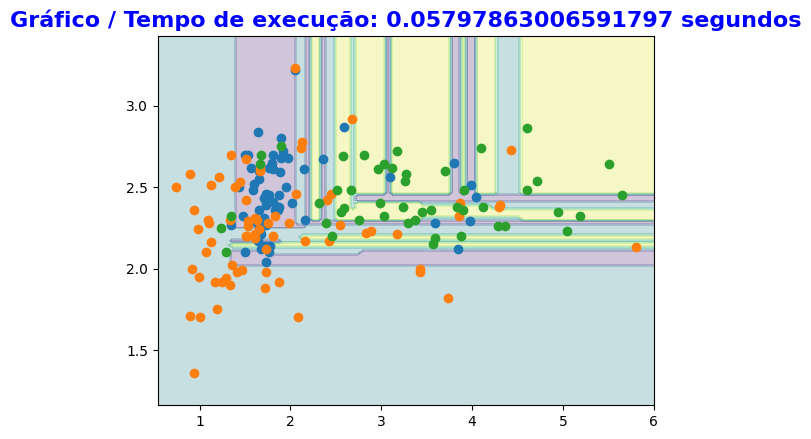

In [ ]:
plotDecisao(Arvore(), X[:,1:3], y)
plotDecisao(Arvore2(), X[:,1:3], y)

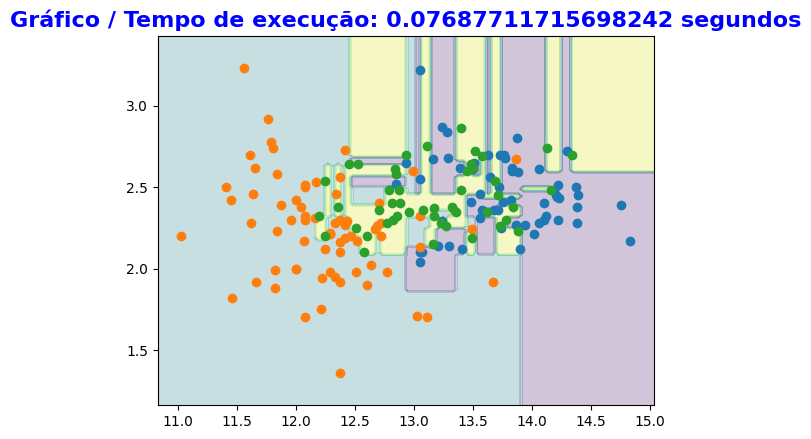

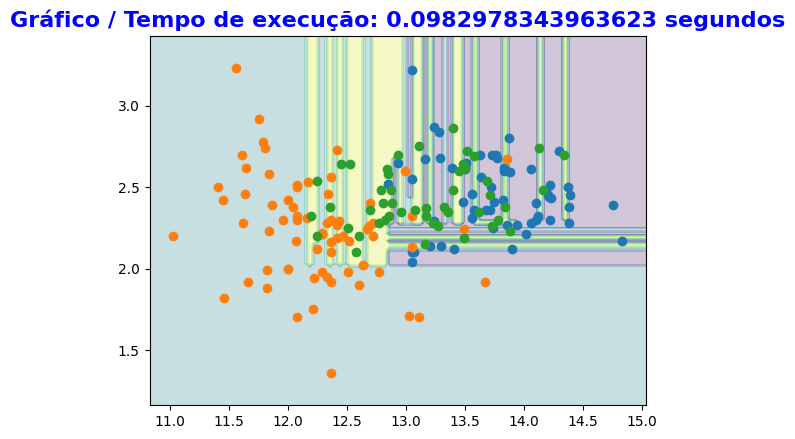

In [ ]:
plotDecisao(Arvore(), X[:,[0,2]], y)
plotDecisao(Arvore2(), X[:,[0,2]], y)

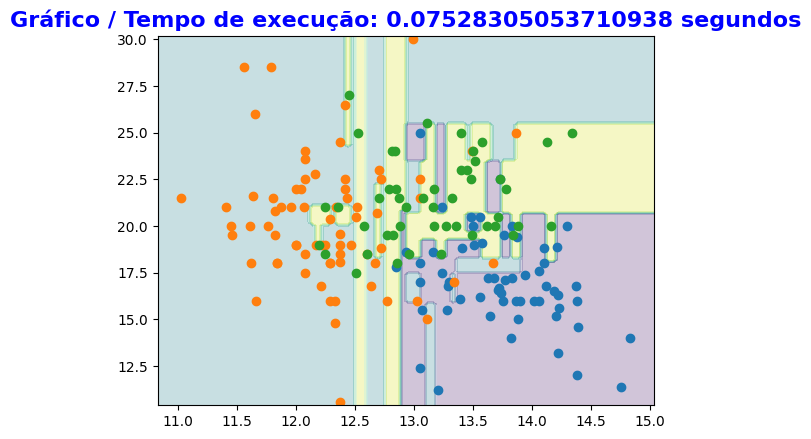

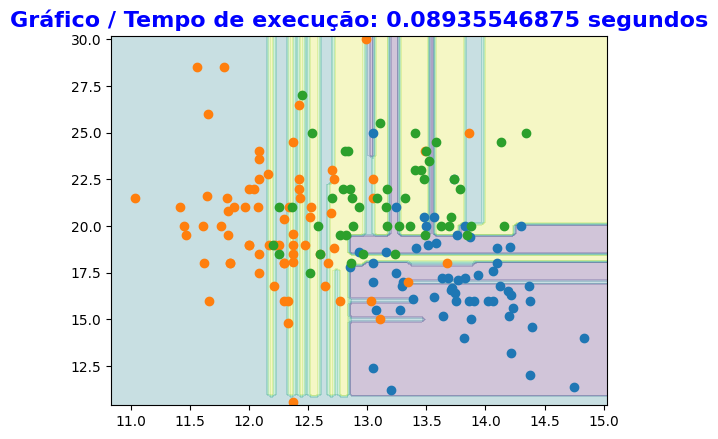

In [ ]:
plotDecisao(Arvore(), X[:,[0,3]], y)
plotDecisao(Arvore2(), X[:,[0,3]], y)